In [0]:
import numpy as np


In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

In [0]:
# MNIST Dataset
original_train_dataset = datasets.MNIST(root='./mnist_data/', train=True, transform=transforms.ToTensor(), download=True)
original_test_dataset = datasets.MNIST(root='./mnist_data/', train=False, transform=transforms.ToTensor(), download=True)

In [0]:
CUDA = True
BATCH_SIZE = 64

In [0]:
# Define Train loader
train_tensors = original_train_dataset.data.float() / 255
test_tensors = original_test_dataset.data.float() / 255

train_dataset = torch.utils.data.TensorDataset(train_tensors, original_train_dataset.targets)
test_dataset = torch.utils.data.TensorDataset(test_tensors, original_test_dataset.targets)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=BATCH_SIZE, shuffle=False)

In [0]:
# [CHANGED] Add dropout layer to introduce diversity in gradients
# [CHANGED] [Important] Use LeakyReLU since it keeps gradients better
discriminator = nn.Sequential(
    nn.Dropout(),
    nn.Linear(784, 256),
    nn.LeakyReLU(0.2),
    nn.Linear(256, 128),
    nn.LeakyReLU(0.2),
    nn.Linear(128, 64),
    nn.Dropout(),
    nn.LeakyReLU(0.2),
    nn.Linear(64, 1),
    nn.Sigmoid()
)

In [0]:
# [CHANGED] [Important] Use LeakyReLU since it keeps noise better
generator = nn.Sequential(
    nn.Linear(128, 128),
    nn.LeakyReLU(0.2),
    nn.Linear(128, 256),
    nn.LeakyReLU(0.2),
    nn.Linear(256, 512),
    nn.LeakyReLU(0.2),
    nn.Linear(512, 784),
    nn.Sigmoid()
)

In [0]:
if CUDA:
  discriminator.cuda()
  generator.cuda()

In [0]:
LEARNING_RATE_D = 0.0002
LEARNING_RATE_G = 0.0002


opt_D = optim.Adam(discriminator.parameters(), lr=LEARNING_RATE_D)
opt_G = optim.Adam(generator.parameters(), lr=LEARNING_RATE_G)

In [0]:
N_EPOCH = 100

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 3) # set default size of plots

epoch: 0 	 last batch loss D: 0.15274077653884888 	 last batch loss G: 4.889920234680176


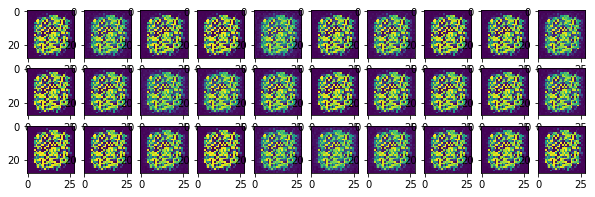

epoch: 1 	 last batch loss D: 0.13455775380134583 	 last batch loss G: 4.464526176452637


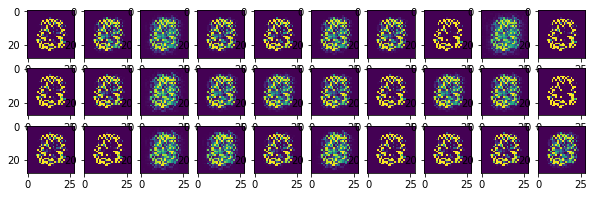

epoch: 2 	 last batch loss D: 0.4066981077194214 	 last batch loss G: 4.918662071228027


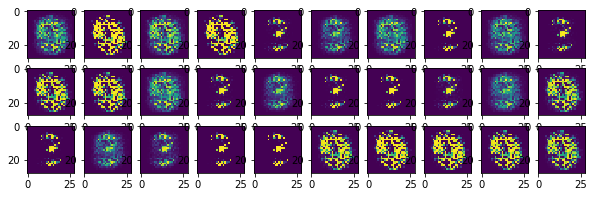

epoch: 3 	 last batch loss D: 0.3828544318675995 	 last batch loss G: 4.448366165161133


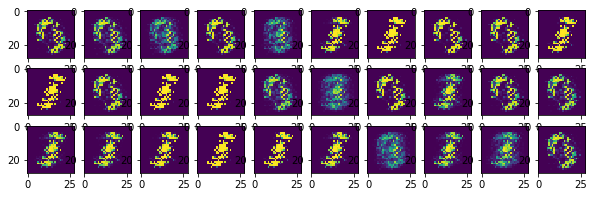

epoch: 4 	 last batch loss D: 0.7459118366241455 	 last batch loss G: 2.4796533584594727


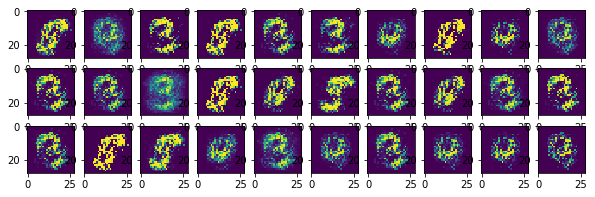

epoch: 5 	 last batch loss D: 0.4613332748413086 	 last batch loss G: 2.362849473953247


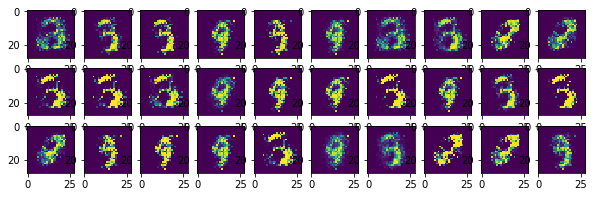

epoch: 6 	 last batch loss D: 0.39698082208633423 	 last batch loss G: 3.6117677688598633


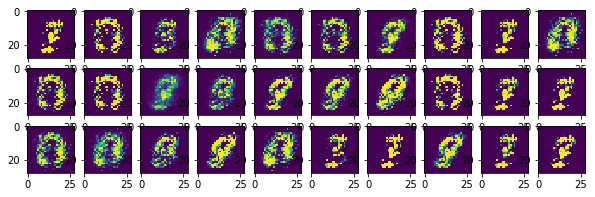

epoch: 7 	 last batch loss D: 0.4129863977432251 	 last batch loss G: 3.4208545684814453


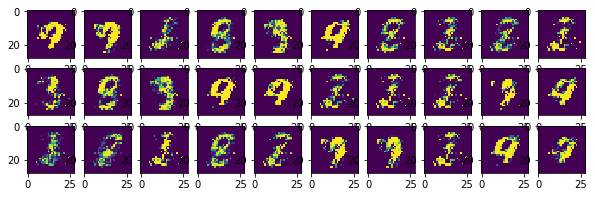

epoch: 8 	 last batch loss D: 0.3979727625846863 	 last batch loss G: 4.078981876373291


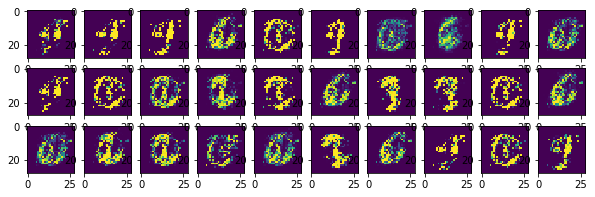

epoch: 9 	 last batch loss D: 0.4061146378517151 	 last batch loss G: 3.902047872543335


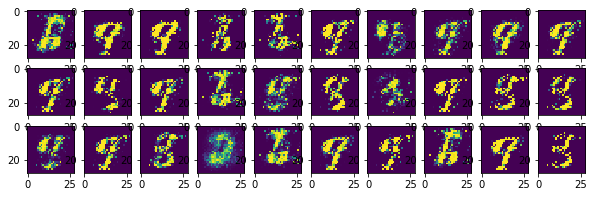

epoch: 10 	 last batch loss D: 0.47234445810317993 	 last batch loss G: 1.8259754180908203


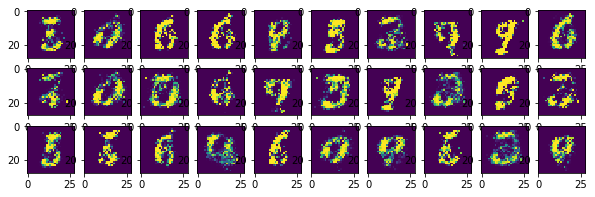

epoch: 11 	 last batch loss D: 0.345328152179718 	 last batch loss G: 2.398533821105957


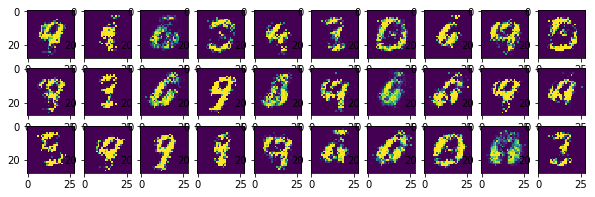

epoch: 12 	 last batch loss D: 0.40904363989830017 	 last batch loss G: 3.138681411743164


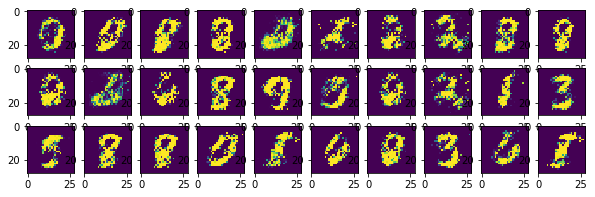

epoch: 13 	 last batch loss D: 0.5750412940979004 	 last batch loss G: 3.5702390670776367


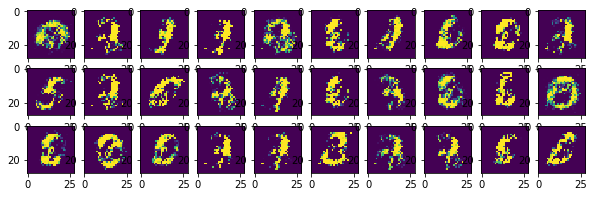

epoch: 14 	 last batch loss D: 0.6853134036064148 	 last batch loss G: 2.8517627716064453


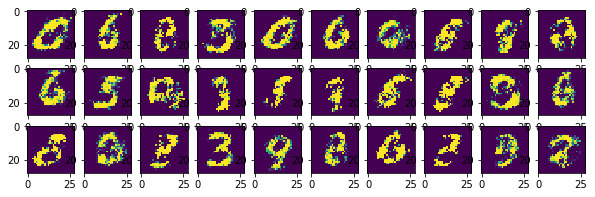

epoch: 15 	 last batch loss D: 0.48309099674224854 	 last batch loss G: 2.3080124855041504


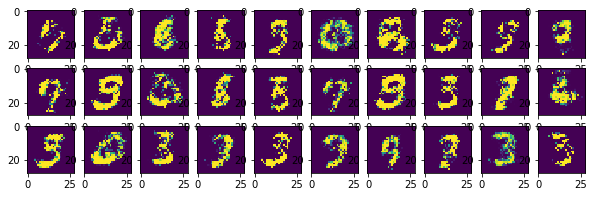

epoch: 16 	 last batch loss D: 0.688933253288269 	 last batch loss G: 2.052137851715088


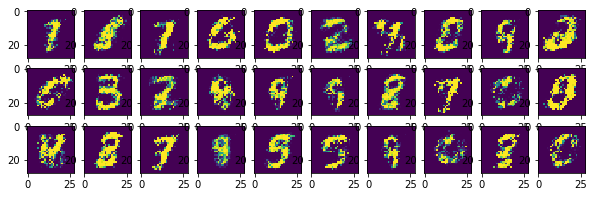

epoch: 17 	 last batch loss D: 0.8176802396774292 	 last batch loss G: 1.4702506065368652


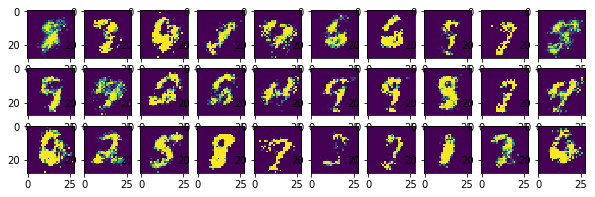

epoch: 18 	 last batch loss D: 0.6432244777679443 	 last batch loss G: 1.8994344472885132


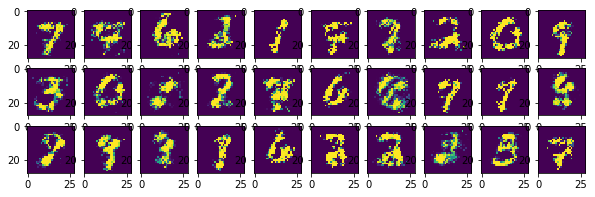

epoch: 19 	 last batch loss D: 0.6820484399795532 	 last batch loss G: 1.8636832237243652


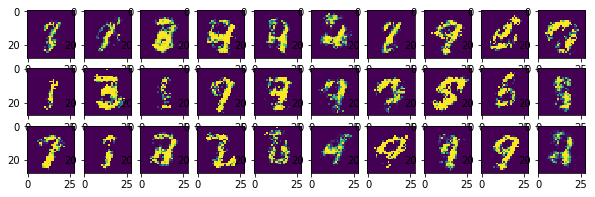

epoch: 20 	 last batch loss D: 0.7954610586166382 	 last batch loss G: 1.9820382595062256


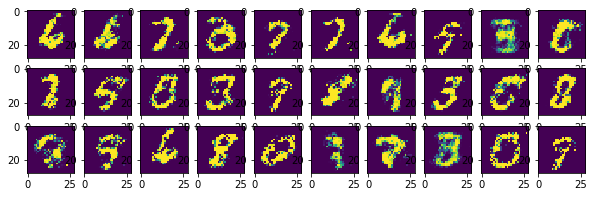

epoch: 21 	 last batch loss D: 0.9534240961074829 	 last batch loss G: 1.231154203414917


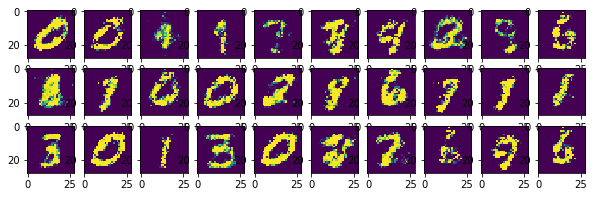

epoch: 22 	 last batch loss D: 0.8820159435272217 	 last batch loss G: 1.4093191623687744


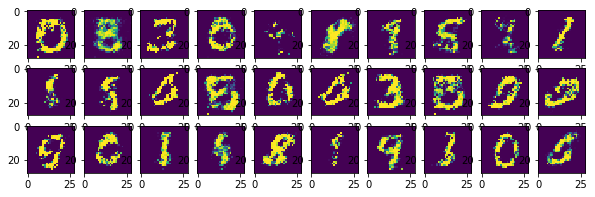

epoch: 23 	 last batch loss D: 1.0351698398590088 	 last batch loss G: 1.5971146821975708


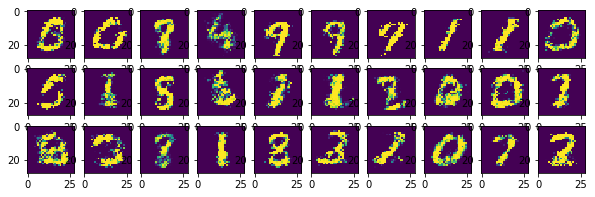

epoch: 24 	 last batch loss D: 0.8810205459594727 	 last batch loss G: 1.4935133457183838


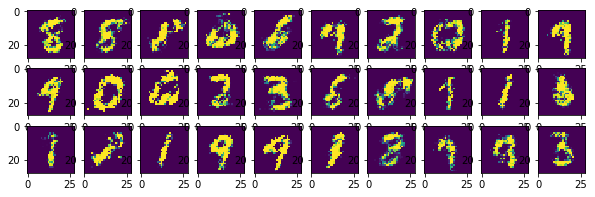

epoch: 25 	 last batch loss D: 0.807389497756958 	 last batch loss G: 1.534938931465149


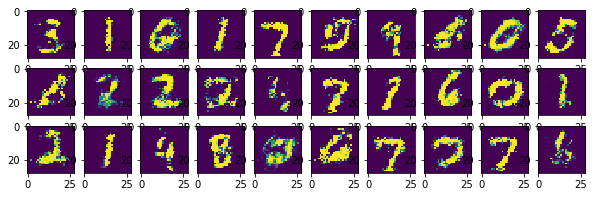

epoch: 26 	 last batch loss D: 0.8136573433876038 	 last batch loss G: 1.327222466468811


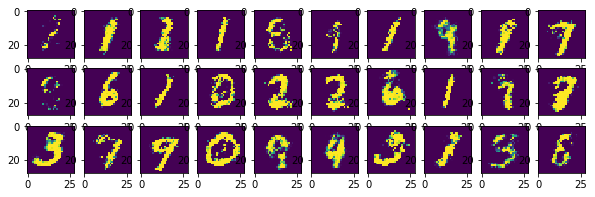

epoch: 27 	 last batch loss D: 1.0284423828125 	 last batch loss G: 1.0418224334716797


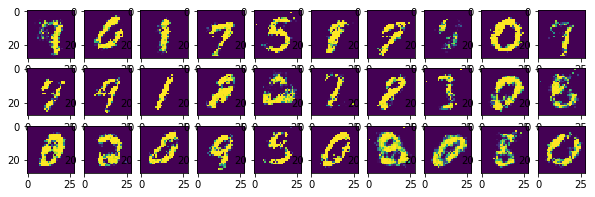

epoch: 28 	 last batch loss D: 0.9915412068367004 	 last batch loss G: 1.2515089511871338


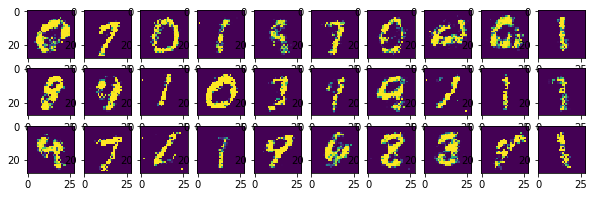

epoch: 29 	 last batch loss D: 1.2325465679168701 	 last batch loss G: 1.2791434526443481


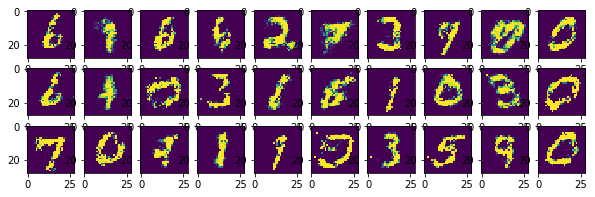

epoch: 30 	 last batch loss D: 1.0934746265411377 	 last batch loss G: 1.3539724349975586


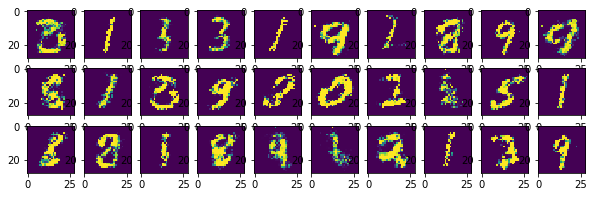

epoch: 31 	 last batch loss D: 1.0639638900756836 	 last batch loss G: 1.0654048919677734


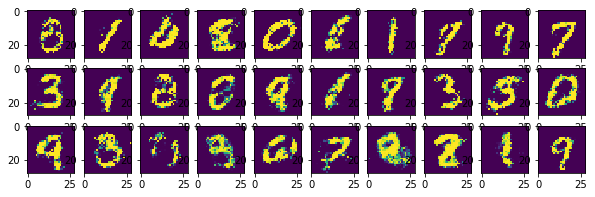

epoch: 32 	 last batch loss D: 0.8942176103591919 	 last batch loss G: 1.2214775085449219


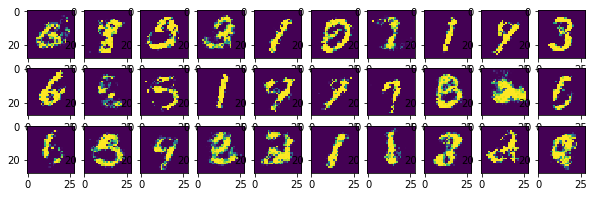

epoch: 33 	 last batch loss D: 0.9395888447761536 	 last batch loss G: 1.2696106433868408


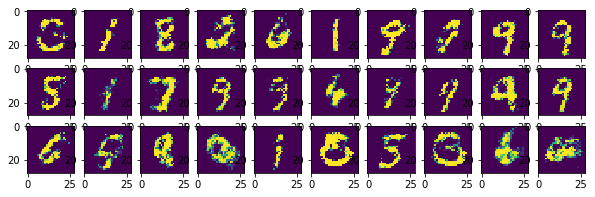

epoch: 34 	 last batch loss D: 1.153322458267212 	 last batch loss G: 1.0213481187820435


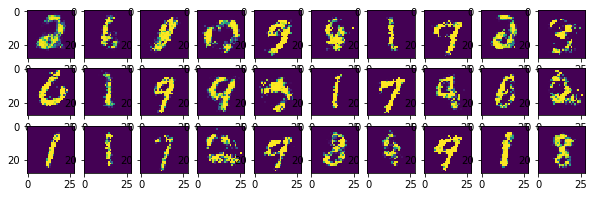

epoch: 35 	 last batch loss D: 1.0996726751327515 	 last batch loss G: 1.29099440574646


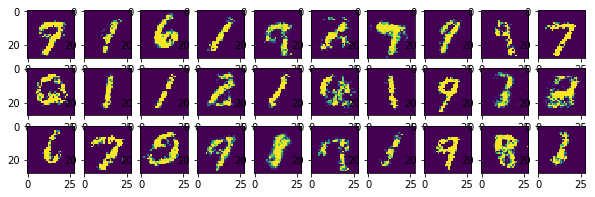

epoch: 36 	 last batch loss D: 1.158398151397705 	 last batch loss G: 1.0540077686309814


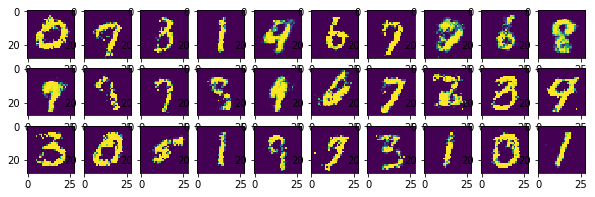

epoch: 37 	 last batch loss D: 1.0406619310379028 	 last batch loss G: 1.2076144218444824


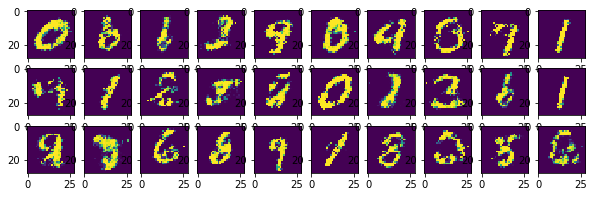

epoch: 38 	 last batch loss D: 1.164203405380249 	 last batch loss G: 1.0399322509765625


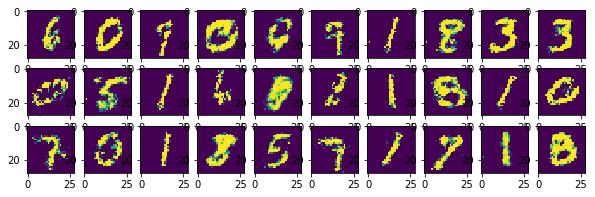

epoch: 39 	 last batch loss D: 0.9946961402893066 	 last batch loss G: 1.0485385656356812


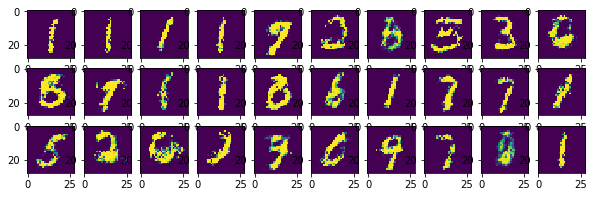

epoch: 40 	 last batch loss D: 1.0387213230133057 	 last batch loss G: 0.9499615430831909


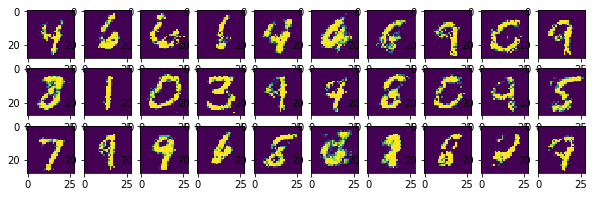

epoch: 41 	 last batch loss D: 1.1426019668579102 	 last batch loss G: 1.0800862312316895


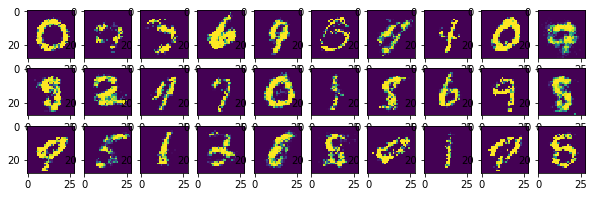

epoch: 42 	 last batch loss D: 1.1373732089996338 	 last batch loss G: 0.8470534086227417


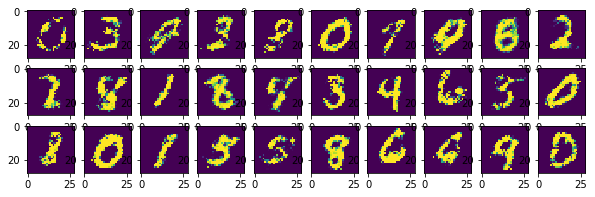

epoch: 43 	 last batch loss D: 1.1586687564849854 	 last batch loss G: 1.1688103675842285


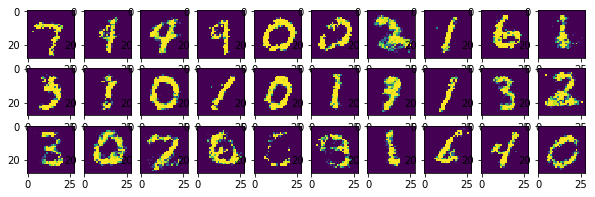

epoch: 44 	 last batch loss D: 1.2540185451507568 	 last batch loss G: 0.9104571342468262


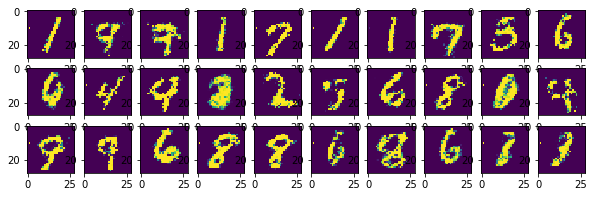

epoch: 45 	 last batch loss D: 1.208190679550171 	 last batch loss G: 1.2615331411361694


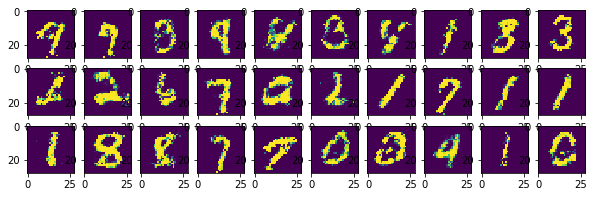

epoch: 46 	 last batch loss D: 1.146989345550537 	 last batch loss G: 1.2296257019042969


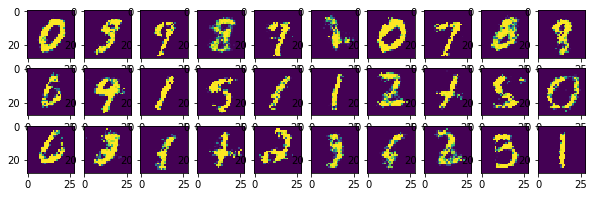

epoch: 47 	 last batch loss D: 1.1706247329711914 	 last batch loss G: 1.0787094831466675


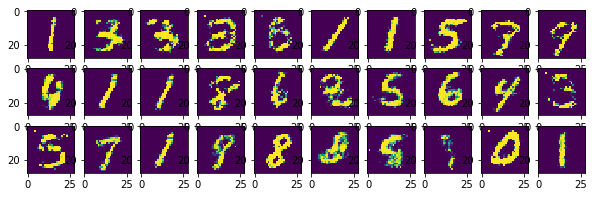

epoch: 48 	 last batch loss D: 1.1005651950836182 	 last batch loss G: 1.1156985759735107


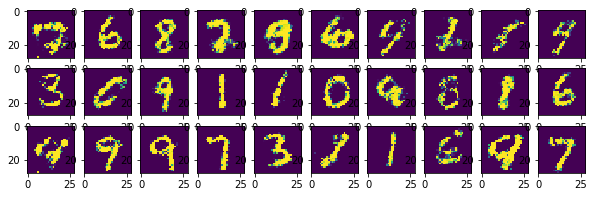

epoch: 49 	 last batch loss D: 0.9476314783096313 	 last batch loss G: 0.9809184670448303


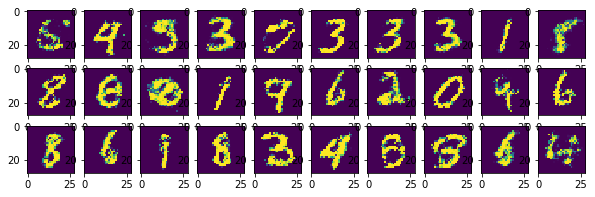

epoch: 50 	 last batch loss D: 1.1450499296188354 	 last batch loss G: 1.1426193714141846


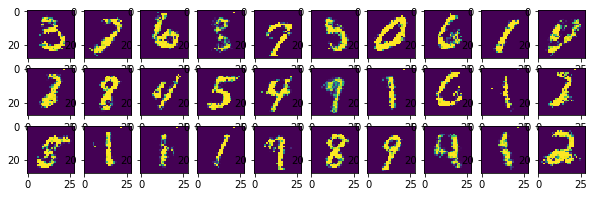

epoch: 51 	 last batch loss D: 1.0131745338439941 	 last batch loss G: 0.961135983467102


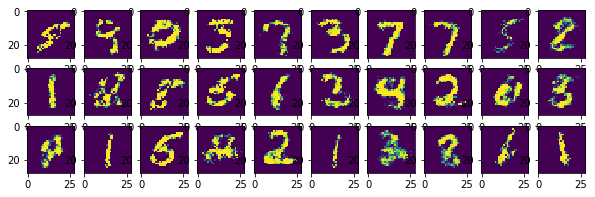

epoch: 52 	 last batch loss D: 1.079114317893982 	 last batch loss G: 0.820219874382019


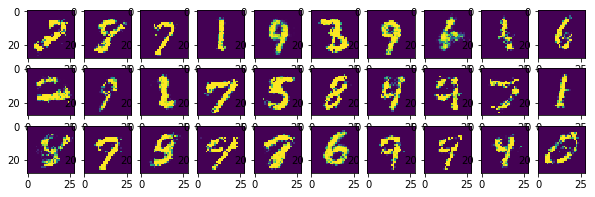

epoch: 53 	 last batch loss D: 1.219975471496582 	 last batch loss G: 1.0690321922302246


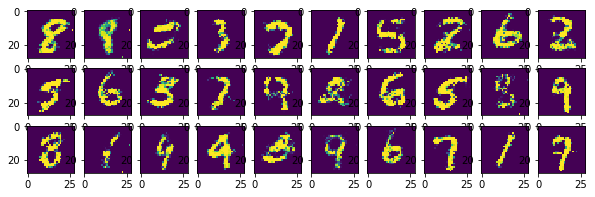

epoch: 54 	 last batch loss D: 1.195143461227417 	 last batch loss G: 1.0051919221878052


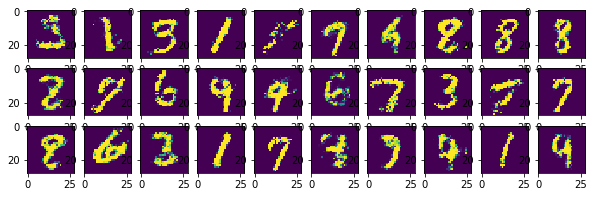

epoch: 55 	 last batch loss D: 1.1600549221038818 	 last batch loss G: 0.9394834041595459


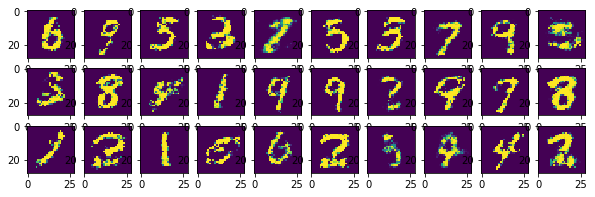

epoch: 56 	 last batch loss D: 1.3593782186508179 	 last batch loss G: 0.8690815567970276


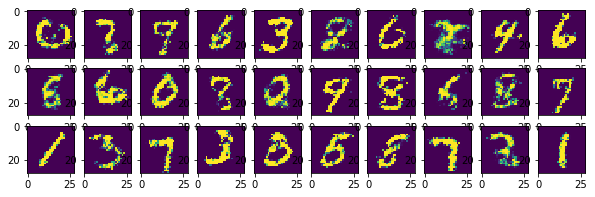

epoch: 57 	 last batch loss D: 1.1048414707183838 	 last batch loss G: 1.1207866668701172


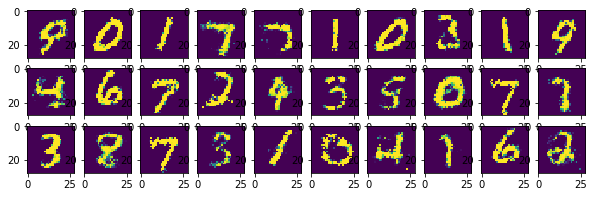

epoch: 58 	 last batch loss D: 1.248345136642456 	 last batch loss G: 0.9469010233879089


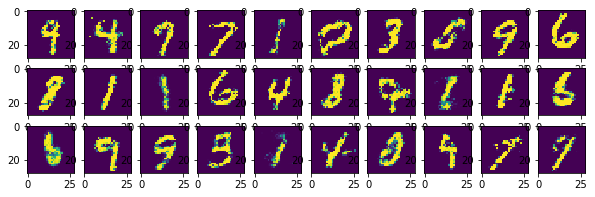

epoch: 59 	 last batch loss D: 1.2845920324325562 	 last batch loss G: 0.8162413835525513


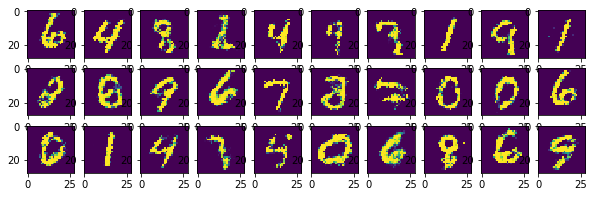

epoch: 60 	 last batch loss D: 1.1320066452026367 	 last batch loss G: 0.9637004733085632


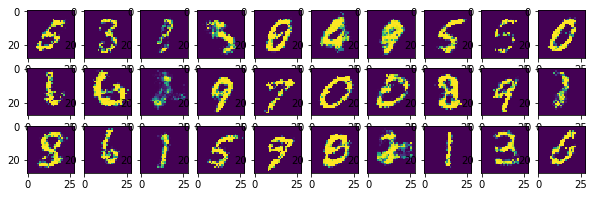

epoch: 61 	 last batch loss D: 1.2947227954864502 	 last batch loss G: 0.8823784589767456


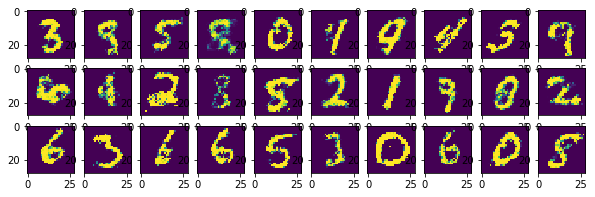

epoch: 62 	 last batch loss D: 1.3677059412002563 	 last batch loss G: 1.0299705266952515


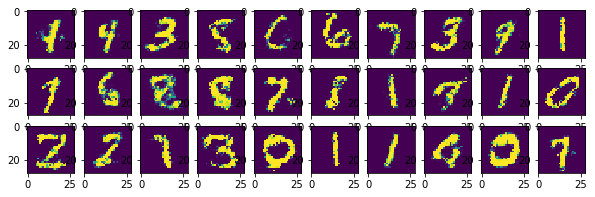

epoch: 63 	 last batch loss D: 1.2487094402313232 	 last batch loss G: 0.9849777817726135


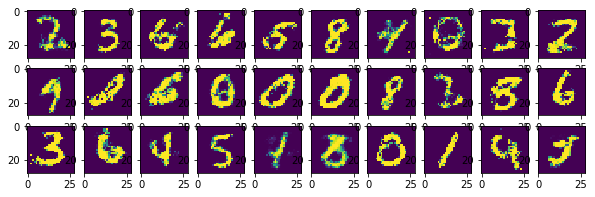

epoch: 64 	 last batch loss D: 1.077584981918335 	 last batch loss G: 0.9604935646057129


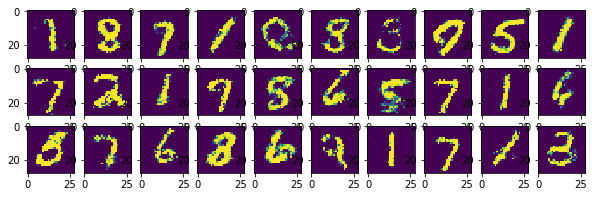

epoch: 65 	 last batch loss D: 1.1587815284729004 	 last batch loss G: 0.8985899686813354


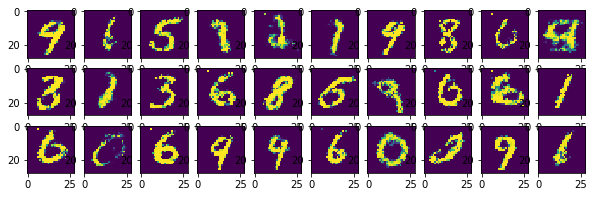

epoch: 66 	 last batch loss D: 1.1852959394454956 	 last batch loss G: 1.0114498138427734


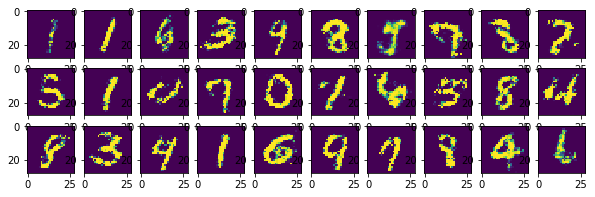

epoch: 67 	 last batch loss D: 1.0391674041748047 	 last batch loss G: 0.9273340702056885


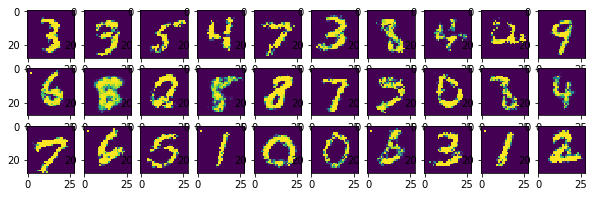

epoch: 68 	 last batch loss D: 1.1553382873535156 	 last batch loss G: 1.0545573234558105


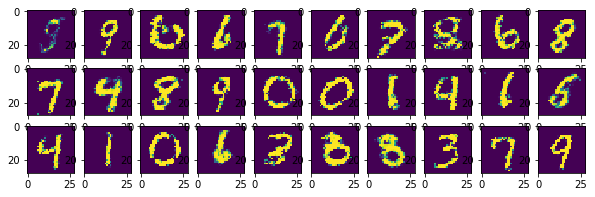

epoch: 69 	 last batch loss D: 1.1903903484344482 	 last batch loss G: 1.1436654329299927


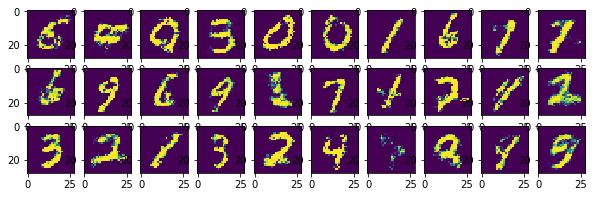

epoch: 70 	 last batch loss D: 1.1400279998779297 	 last batch loss G: 1.082773208618164


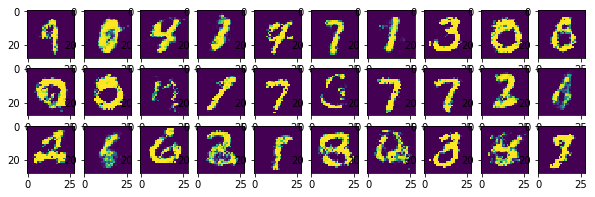

epoch: 71 	 last batch loss D: 1.3012319803237915 	 last batch loss G: 0.886743426322937


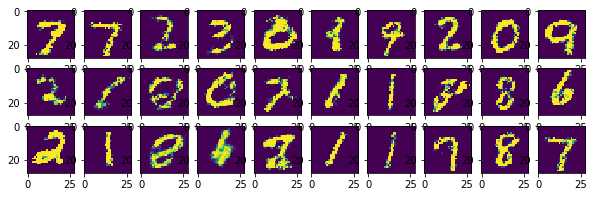

epoch: 72 	 last batch loss D: 1.228841781616211 	 last batch loss G: 1.072057843208313


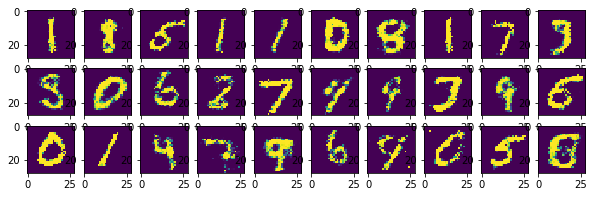

epoch: 73 	 last batch loss D: 1.2761292457580566 	 last batch loss G: 0.943913996219635


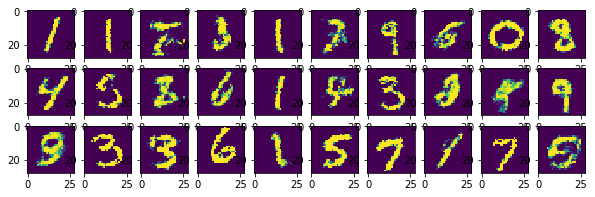

epoch: 74 	 last batch loss D: 1.3691315650939941 	 last batch loss G: 0.9255794286727905


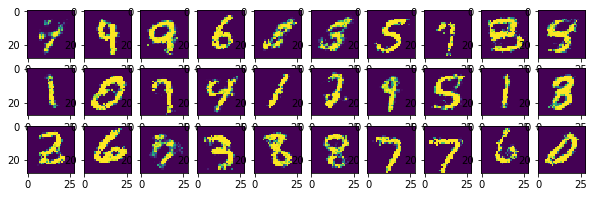

epoch: 75 	 last batch loss D: 1.2583619356155396 	 last batch loss G: 1.0160470008850098


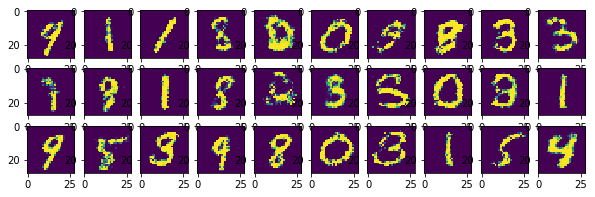

epoch: 76 	 last batch loss D: 1.2633960247039795 	 last batch loss G: 0.892353355884552


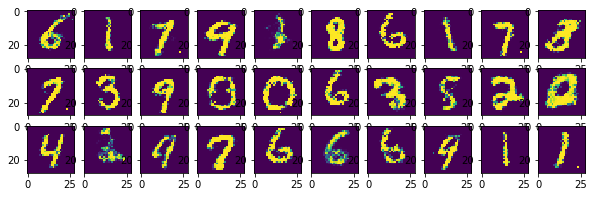

epoch: 77 	 last batch loss D: 1.1433807611465454 	 last batch loss G: 0.8040947914123535


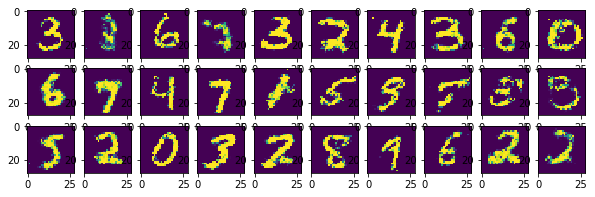

epoch: 78 	 last batch loss D: 1.1995375156402588 	 last batch loss G: 0.7946993112564087


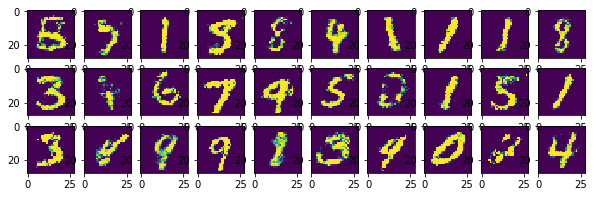

epoch: 79 	 last batch loss D: 1.1928443908691406 	 last batch loss G: 0.9346452951431274


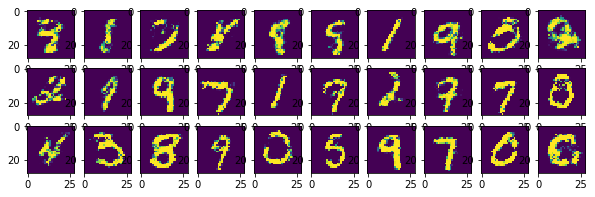

epoch: 80 	 last batch loss D: 1.1982848644256592 	 last batch loss G: 0.8754845261573792


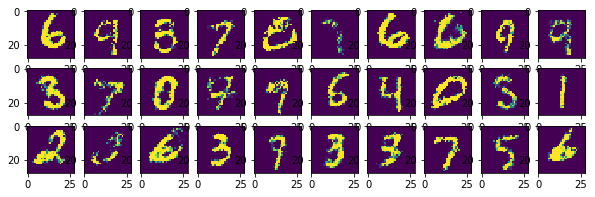

epoch: 81 	 last batch loss D: 1.1940784454345703 	 last batch loss G: 0.8986812829971313


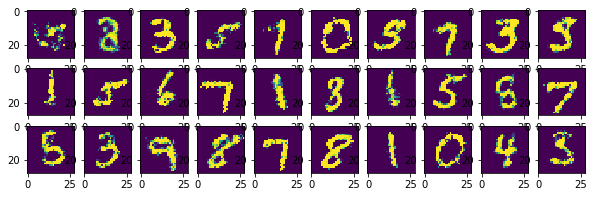

epoch: 82 	 last batch loss D: 1.1421425342559814 	 last batch loss G: 0.8705158233642578


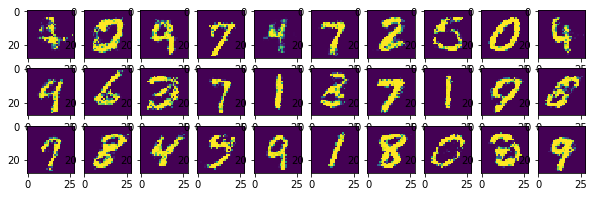

epoch: 83 	 last batch loss D: 1.3058288097381592 	 last batch loss G: 0.7589074373245239


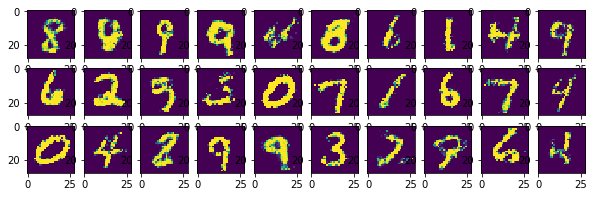

epoch: 84 	 last batch loss D: 1.287048101425171 	 last batch loss G: 0.8369358777999878


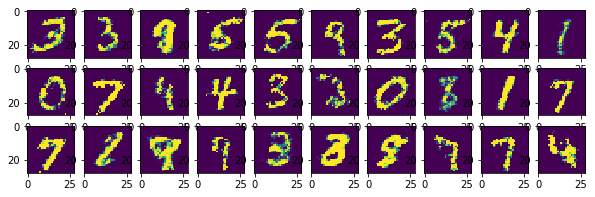

epoch: 85 	 last batch loss D: 1.3047816753387451 	 last batch loss G: 0.8756929636001587


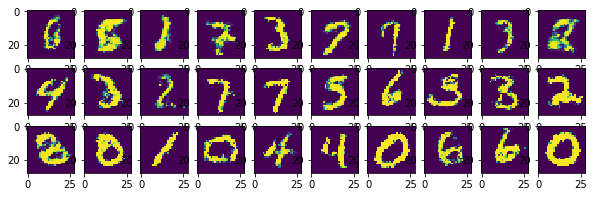

epoch: 86 	 last batch loss D: 1.2090320587158203 	 last batch loss G: 0.846988320350647


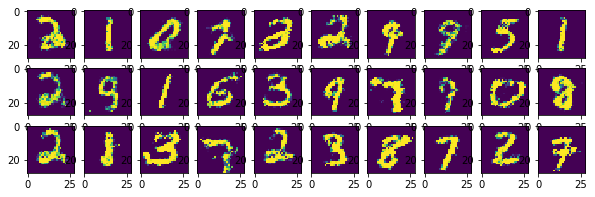

epoch: 87 	 last batch loss D: 1.1782286167144775 	 last batch loss G: 0.9783894419670105


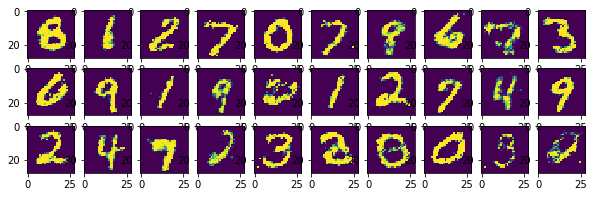

epoch: 88 	 last batch loss D: 1.3768045902252197 	 last batch loss G: 0.8861030340194702


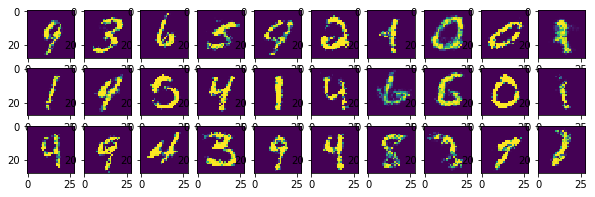

epoch: 89 	 last batch loss D: 1.1497573852539062 	 last batch loss G: 0.7471334338188171


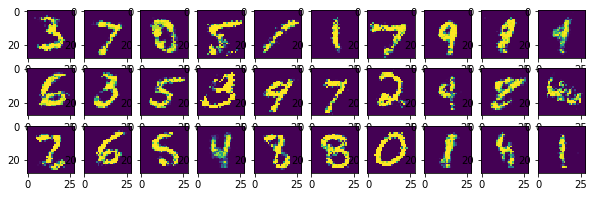

epoch: 90 	 last batch loss D: 1.3333452939987183 	 last batch loss G: 0.882743775844574


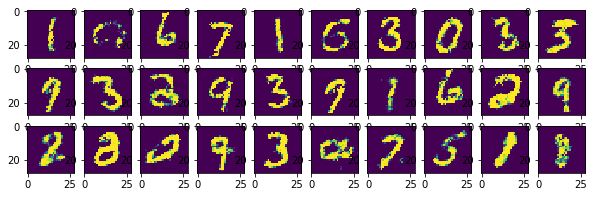

epoch: 91 	 last batch loss D: 1.3647527694702148 	 last batch loss G: 0.9445699453353882


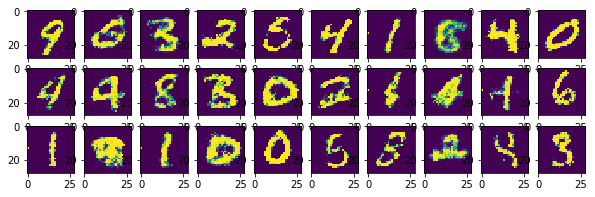

epoch: 92 	 last batch loss D: 1.3275043964385986 	 last batch loss G: 0.785810112953186


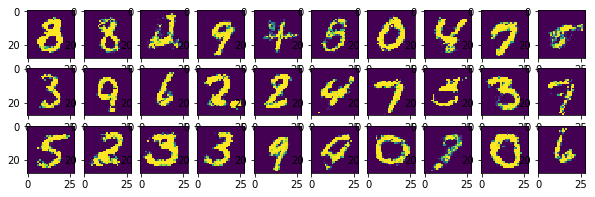

epoch: 93 	 last batch loss D: 1.2551491260528564 	 last batch loss G: 0.8383970856666565


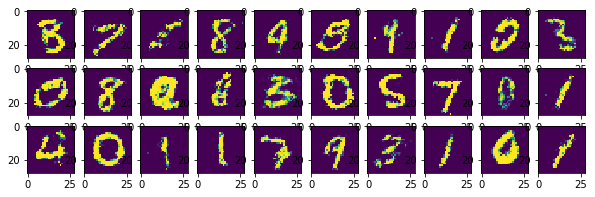

epoch: 94 	 last batch loss D: 1.3531219959259033 	 last batch loss G: 0.8255468606948853


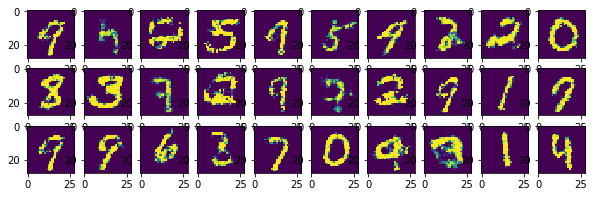

epoch: 95 	 last batch loss D: 1.2681035995483398 	 last batch loss G: 0.862822413444519


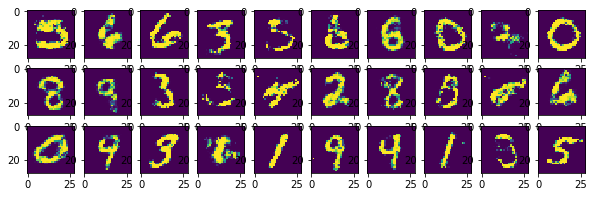

epoch: 96 	 last batch loss D: 1.2225966453552246 	 last batch loss G: 0.73600172996521


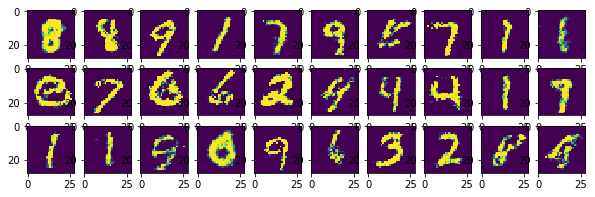

epoch: 97 	 last batch loss D: 1.296553134918213 	 last batch loss G: 0.9091501832008362


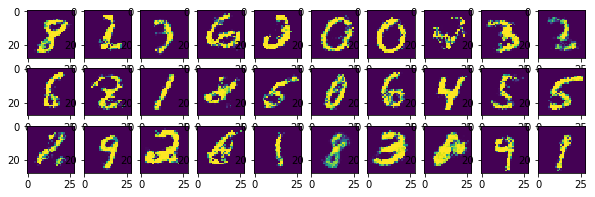

epoch: 98 	 last batch loss D: 1.148297667503357 	 last batch loss G: 0.7807734608650208


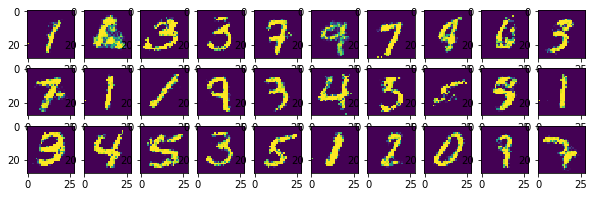

epoch: 99 	 last batch loss D: 1.2026610374450684 	 last batch loss G: 0.8241982460021973


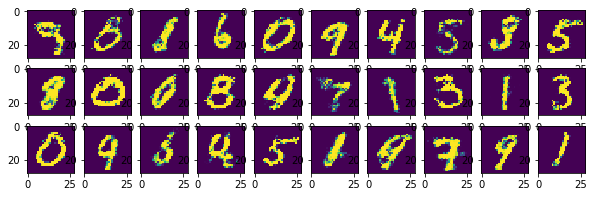

In [12]:
# [CHANGED] EPSILON is not needed anymore
# EPSILON = 1e-6

for epoch in range(N_EPOCH):
    for i, (img, label) in enumerate(train_loader):
        img = img.flatten(start_dim=1)

        real_img = img
        if CUDA:
            real_img = real_img.cuda()

        fake_labels = torch.zeros(img.shape[0], 1).cuda()
        real_labels = torch.ones(img.shape[0], 1).cuda()

        #########################
        z = torch.randn(img.shape[0], 128)
        if CUDA:
            z = z.cuda()
        fake_img = generator(z)

        opt_D.zero_grad()
        # [CHANGED] BCE is more stable
        #         loss_d = -(torch.log(EPSILON + 1 - discriminator(fake_img.detach())) + 
        #                    torch.log(EPSILON + discriminator(real_img))).mean()
        loss_d = (F.binary_cross_entropy(discriminator(fake_img.detach()), fake_labels) +
                  F.binary_cross_entropy(discriminator(real_img), real_labels))
        loss_d.backward()
        opt_D.step()
        #########################
        z = torch.randn(img.shape[0], 128)
        if CUDA:
          z = z.cuda()
        fake_img = generator(z)

        opt_G.zero_grad()
        # [CHANGED] BCE is more stable
        #     loss_g = - torch.log(EPSILON + discriminator(fake_img)).mean()
        loss_g = F.binary_cross_entropy(discriminator(fake_img), real_labels)
        loss_g.backward()
        opt_G.step()
        #########################

    
    print("epoch: {} \t last batch loss D: {} \t last batch loss G: {}".format(epoch, loss_d.item(), loss_g.item()))

    # [CHANGED] Better output
    for i in range(3):
        for j in range(10):
            plt.subplot(3, 10, i * 10 + j + 1)
            plt.imshow(fake_img[i * 10 + j].detach().cpu().view(28, 28).numpy())
    plt.show()
